In [50]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd


In [51]:
# Files to load
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"


In [52]:
# Read the city data file and store it in a pandas DataFrame.
city_data_df = pd.read_csv(city_data_to_load)
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [53]:
# Read the ride data file and store it in a pandas DataFrame.
ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


In [54]:
# Cleaning city data ---------

# 1. Get rows containing null values
# 2. Ensure consistent data types across columns
# 3. Find out total data points in each city



In [55]:
# 1. Get the columns and the rows that are not null.
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [56]:
# 1. Get the columns and the rows that are not null.
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [57]:
# 1. No null values seen in our dataset!

In [58]:
# Get the data types of each column.
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [59]:
# Get the unique values of the type of city.
# Returns an array of the unique values in the "type" column using the .unique() method
city_data_df["type"].unique()


array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [60]:
# Get the number of data points from the Urban cities.
print(sum(city_data_df["type"]=="Urban"))

# Get the number of data points from the Rural cities.
print(sum(city_data_df["type"]=="Rural"))

# Get the number of data points from the Suburban cities.
print(sum(city_data_df["type"]=="Suburban"))

66
18
36


In [61]:
# Cleaning the ride_data dataframe -------------

# 1. Get all rows containing null values
# 2. Make sure fare and ride_id columns are numerical data types and not string/objects

# Get the columns and the rows that are not null.
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [62]:
# Get the columns and the rows that are not null.
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [63]:
# No null values found in our dataset

In [64]:
# Get the data types of each column.
ride_data_df.dtypes


city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [65]:
# Fare is a float, as expected. Ride ID is an integer, also as expected

In [66]:
# Merging/Joining our dataframes ----------

# Since the city column is common between both dataframes, we will merge them on this column
# the on= parameter takes a list with the column names of the left dataframe, then the right dataframe. 
# If we wanted to merge on two columns with differently named column names, we would change them in the appropriate side
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city","city"])

pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [67]:
# Creating a bubble chart plotting total number of rides (per city) against the average fare, with driver count per city reflected in bubble size

# To do this, we need to find the following metrics:
    # 1. Avg fare for each city
    # 2. Total number of rides for each city type
    # 3. Size of marker/bubble correspond to # of drivers in city

# Since we're working with three city types (urban, suburban, rural), it would be efficient to split our dataframe into three sub dataframes to run analyses on

# Create the Urban city DataFrame.
urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]

# Create the Suburban and Rural city DataFrames.
suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]
rural_cities_df.head()

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural


In [68]:
# To find the # of rides per city (X-axis), we need to use a function to count the # of each city

# We can use the groupby() function to set the index to the city and the ride_id to be the count() of ride_ids associated
# Remember to use groupby() we should also use a mathematical function; otherwise this will just return groupby object
urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]
urban_ride_count.head()

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

In [69]:
# Create the suburban and rural ride count.
suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]

rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]

In [70]:
# Get average fare for each city in the urban cities.
urban_avg_fare = urban_cities_df.groupby(["city"]).mean()["fare"]
urban_avg_fare.head()

city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64

In [71]:
# Get average fare for each city in the suburban and rural cities.
suburban_avg_fare = suburban_cities_df.groupby(["city"]).mean()["fare"]
rural_avg_fare = rural_cities_df.groupby(["city"]).mean()["fare"]


In [72]:
# Getting the average number of drivers for each city in each dataset

# Get the average number of drivers for each urban city.
urban_driver_count = urban_cities_df.groupby(["city"]).mean()["driver_count"]

# Get the average number of drivers for each city for the suburban and rural cities.
suburban_driver_count = suburban_cities_df.groupby(["city"]).mean()["driver_count"]
rural_driver_count = rural_cities_df.groupby(["city"]).mean()["driver_count"]


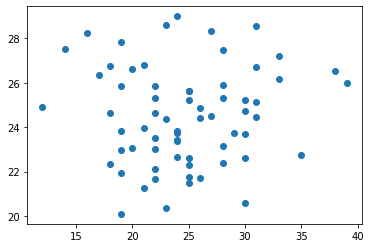

In [73]:
# Assembling the Bubble Chart (Matlab method) ------------

# x-axis: # of rides for each city
# y-axis: average fare for each city
# marker size: average # drivers in each city

# Create our Urban Cities plot:
plt.scatter(urban_ride_count, urban_avg_fare)

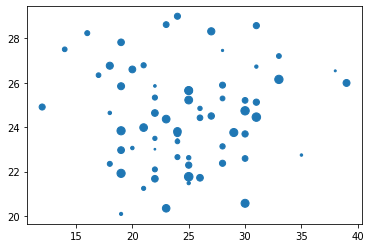

In [74]:
# Adjust the size of the markers in our scatter plot:
# Pass in the urban_driver_count for the size of the marker argument s=

plt.scatter(urban_ride_count,
      urban_avg_fare,
      s=urban_driver_count)

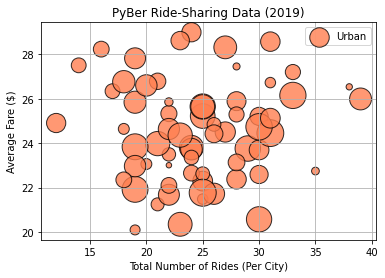

In [75]:
# Enhance the readability by:
#   1. increasing the size of markers by a factor of 10
#   2. giving markers a black edgecolor/outline
#   3. setting their transparency (alpha) to 80%
#   4. Assigning labels and gridlines 

# Build the scatter plots for urban cities.
plt.scatter(urban_ride_count,
      urban_avg_fare,
      s=10*urban_driver_count, c="coral",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Urban")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
# Add the legend.
plt.legend()

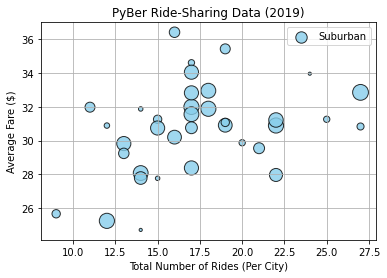

In [76]:
# Creathe suburban city ubble chart:

# Build the scatter plots for suburban cities.
plt.scatter(suburban_ride_count,
      suburban_avg_fare,
      s=10*suburban_driver_count, c="skyblue",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Suburban")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
# Add the legend.
plt.legend()

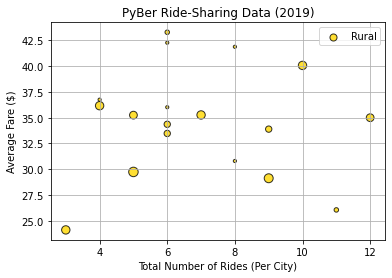

In [77]:
# Create the rural cities bubble chart:

# Build the scatter plots for rural cities.
plt.scatter(rural_ride_count,
      rural_avg_fare,
      s=10*rural_driver_count, c="gold",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Rural")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
# Add the legend.
plt.legend()

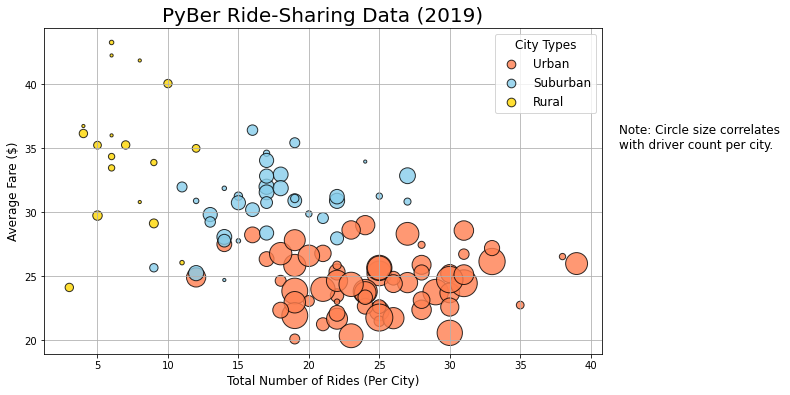

In [93]:
# Creating a COMBINED bubble chart with the above data

# Since Jupyter Notebook executes code on a per-cell basis, in order to combine plots, we can plot them all in a single cell:

# Add the scatter charts for each type of city.
# Edit subplot size to be bigger, rectangular shape
# Notice xlimit does not need to be manually set, but instead is automatically expanded based off the data plotted
plt.subplots(figsize=(10,6))
plt.scatter(urban_ride_count,
      urban_avg_fare,
      s=10*urban_driver_count, c="coral",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Urban")

plt.scatter(suburban_ride_count,
      suburban_avg_fare,
      s=10*suburban_driver_count, c="skyblue",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Suburban")

plt.scatter(rural_ride_count,
      rural_avg_fare,
      s=10*rural_driver_count, c="gold",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Rural")

# Add labels, title, and gridlines
plt.title("PyBer Ride-Sharing Data (2019)", fontsize=20)
plt.ylabel("Average Fare ($)", fontsize=12)
plt.xlabel("Total Number of Rides (Per City)", fontsize=12)
plt.grid(True)

# Add the legend. Notice that by automatically plotting the legend, it scales marker size based off the average value of data in that series
# We need to correct this by scaling the legend to the the same size and adding som other parameters

# Create a legend:
# Assign fontsize to standard 12pt font. Expanded mode expands the legend box. 
# Scaterpoints = 1 assigns the number of markers to present each series (2 = 2 circles)
# Loc=best sets the location to be the best location based off the nature of data in the plot
lgnd = plt.legend(fontsize="12", mode="Expanded",
        scatterpoints=1, loc="best", title="City Types")
# We access the first, second, and third legendHandle  of the legend object lgnd, and access the underscore property _sizes
# We assign them all to be a uniform value of 75
# This is a hack -- look into this further. The PROBLEM HERE IS ENSURING CONSISTENT SIZE OF MARKERS, INSTEAD OF RELATIVE      
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

# Add text describing the meaning of varying bubble sizes in the chart
# plt.text takes coordinates as first and second arguments, the text as the third
# subsequent arguments define the parameters of the message (like fontsize)
plt.text(42, 35, "Note: Circle size correlates \nwith driver count per city.", fontsize="12")

# Save the figure.
plt.savefig("analysis/Fig1.png")

# Show the plot
plt.show()
